# PROJECT: Student Habits Performance Prediction

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


**Load data**

In [2]:
df=pd.read_csv("student_habits_performance.csv")

In [3]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


# Basic checks

In [4]:
df.dtypes

student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object

In [5]:
df.shape

(1000, 16)

In [6]:
df.size

16000

In [7]:
df.head()  #

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [8]:
df.tail()  #last 5

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7
999,S1999,19,Female,4.3,2.9,1.9,No,89.4,7.1,Good,2,Bachelor,Average,8,No,74.9


In [9]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [10]:
df.info()  #datatypes and null value count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [11]:
df.describe()  #all numerical data

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [12]:
df.describe(include='object') #rest categorical data

,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,1000,909,1000,1000
unique,1000,3,2,3,3,3,2
top,S1999,Female,No,Fair,High School,Good,No
freq,1,481,785,437,392,447,682


In [13]:
df.describe(include=object).columns

Index(['student_id', 'gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation'],
      dtype='object')

# Handling the missing values

In [14]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
categorical_cols=['gender','part_time_job','diet_quality','parental_education_level','internet_quality','extracurricular_participation']

In [19]:
for col in categorical_cols:
    print(f"value counts for {col}: \n {df[col].value_counts()}")

value counts for gender: 
 gender
Male      440
Female    433
Other      36
Name: count, dtype: int64
value counts for part_time_job: 
 part_time_job
No     713
Yes    196
Name: count, dtype: int64
value counts for diet_quality: 
 diet_quality
Fair    396
Good    347
Poor    166
Name: count, dtype: int64
value counts for parental_education_level: 
 parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64
value counts for internet_quality: 
 internet_quality
Good       410
Average    352
Poor       147
Name: count, dtype: int64
value counts for extracurricular_participation: 
 extracurricular_participation
No     620
Yes    289
Name: count, dtype: int64


# EDA (Exploratory Data Analysis)

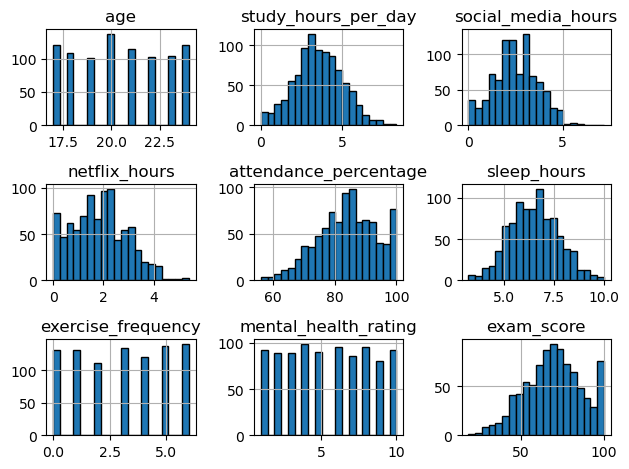

In [20]:
df.hist(bins=20,edgecolor='black')
plt.tight_layout()
plt.show()

In [21]:
# For categorical cols:

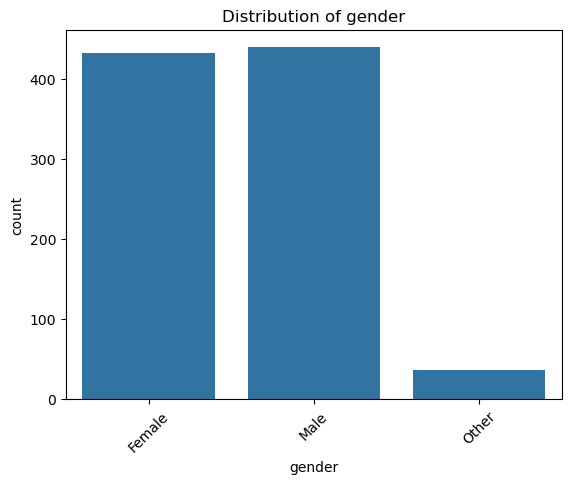

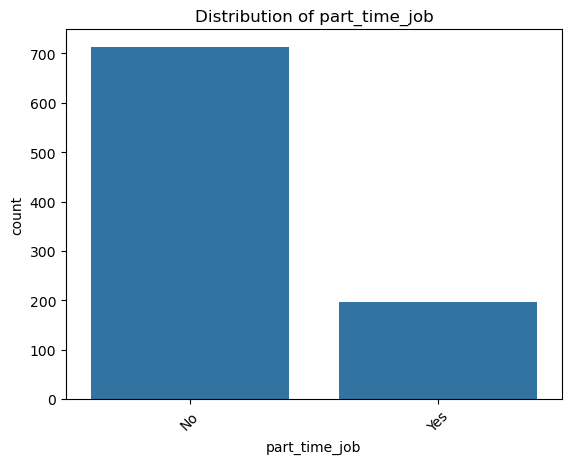

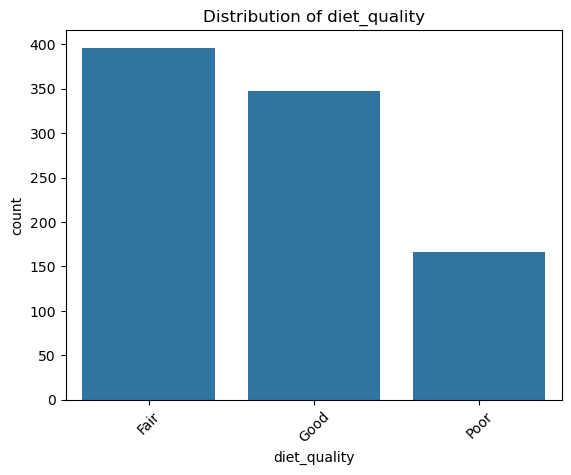

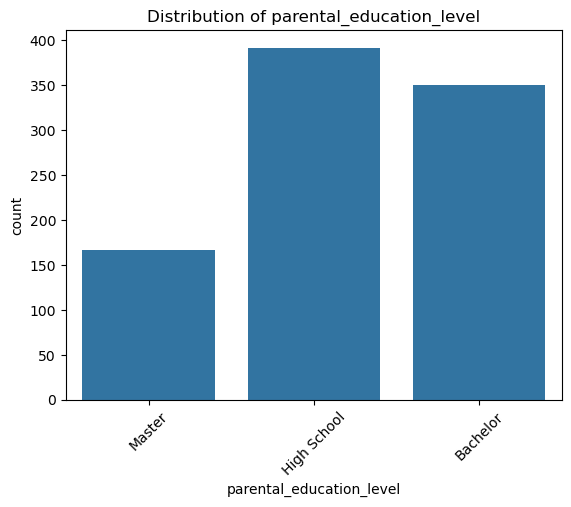

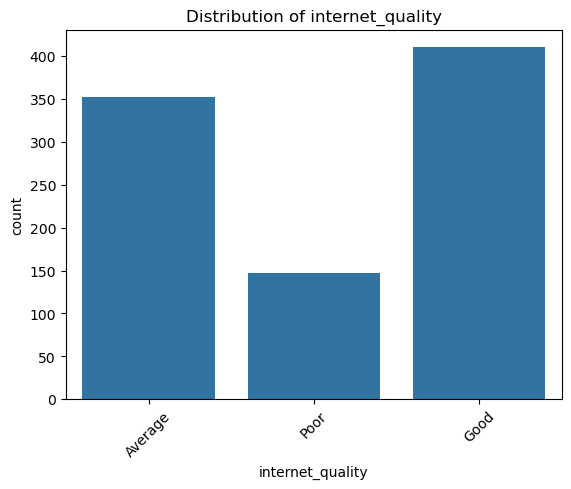

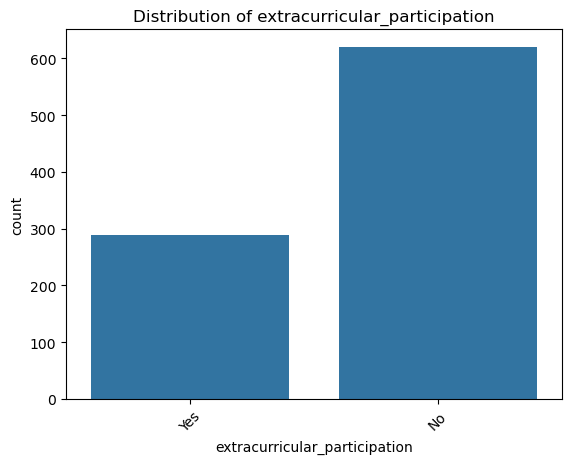

In [22]:
for col in categorical_cols:
    sns.countplot(x=col,data=df)
    plt.title(f"Distribution of {col}") #plot of every columns
    plt.xticks(rotation=45)   #to rotate the x-axis 
    plt.show()

# Correlation

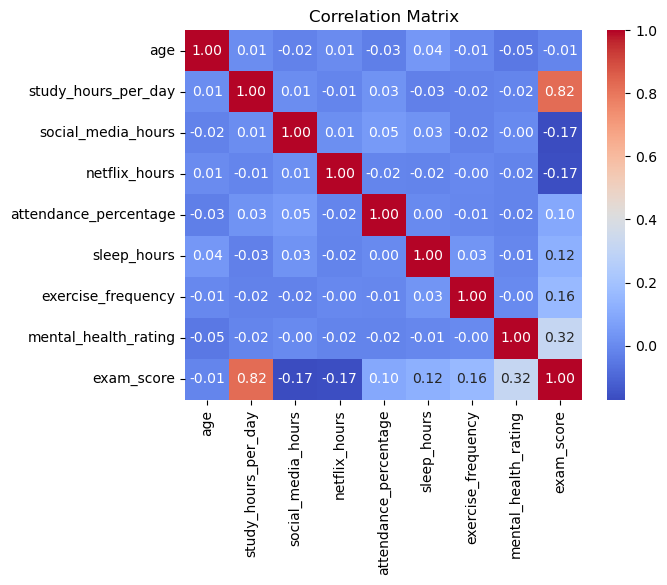

In [23]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='.2f') #only numerical data,annot=to show num.,fmt=decimal after every 2 points
plt.title("Correlation Matrix")
plt.show()

In [24]:
# For numerical cols:

In [25]:
df.describe().columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score'],
      dtype='object')

In [26]:
numeric_cols=['age','study_hours_per_day','social_media_hours','netflix_hours',
              'attendence_percentage','sleep_hours','exercise_frequency',
              'mental_health_rating','exam_score']

In [28]:
df.columns.tolist()

['student_id',
 'age',
 'gender',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'part_time_job',
 'attendance_percentage',
 'sleep_hours',
 'diet_quality',
 'exercise_frequency',
 'parental_education_level',
 'internet_quality',
 'mental_health_rating',
 'extracurricular_participation',
 'exam_score']

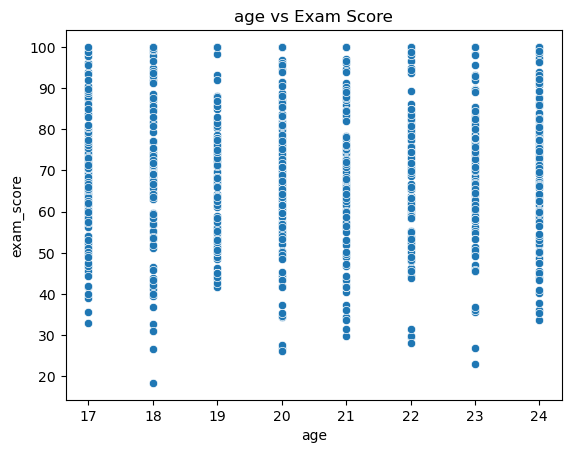

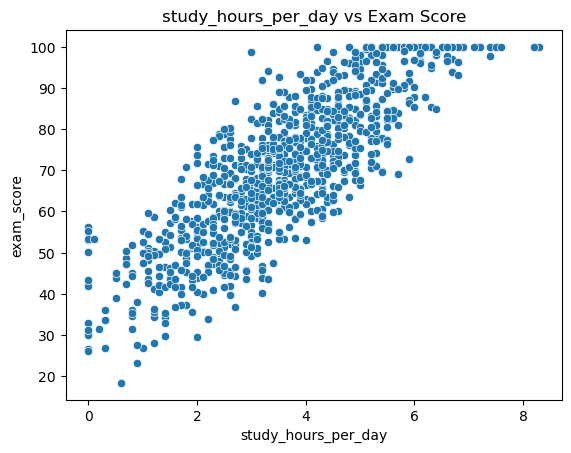

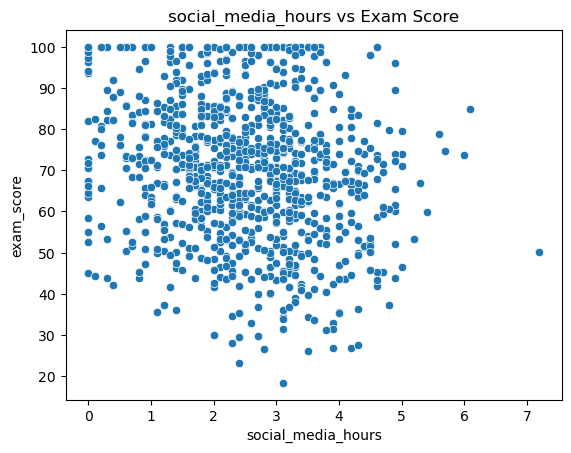

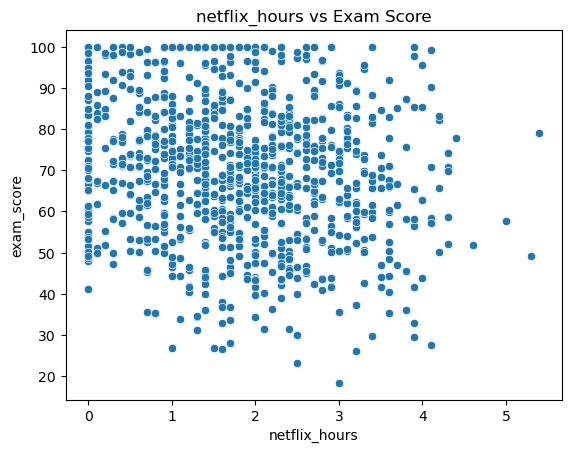

ValueError: Could not interpret value `attendence_percentage` for `x`. An entry with this name does not appear in `data`.

In [27]:
for col in numeric_cols:
    sns.scatterplot(x=col,y='exam_score',data=df)
    plt.title(f'{col} vs Exam Score')
    plt.show()

# Detect Outliers

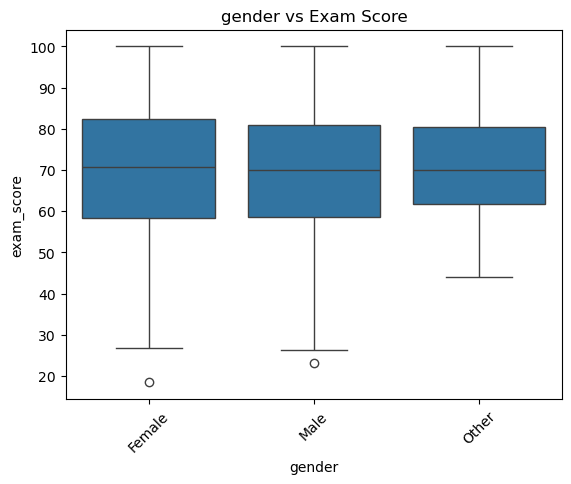

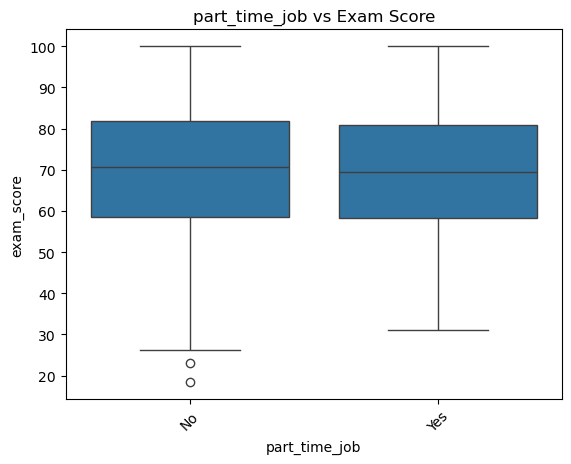

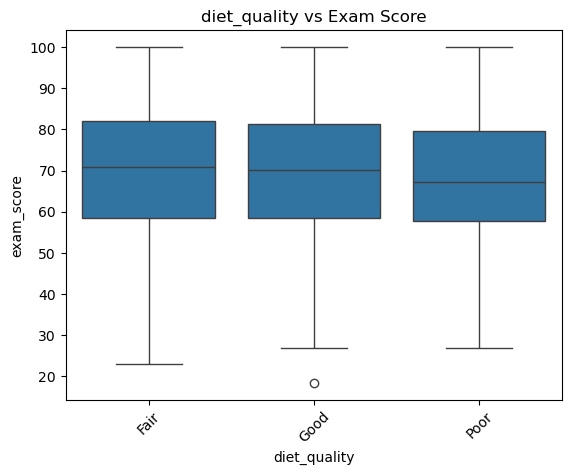

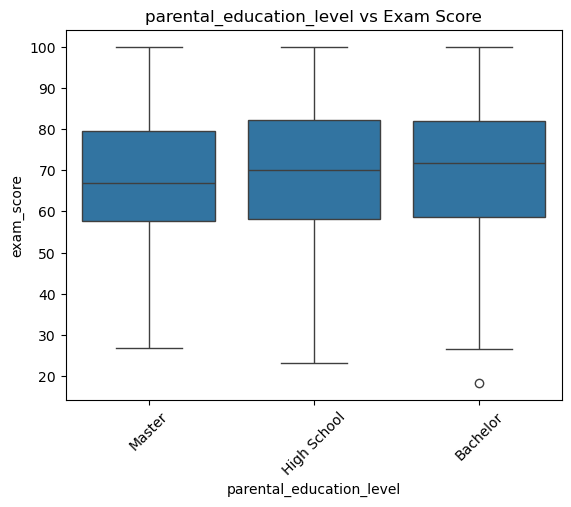

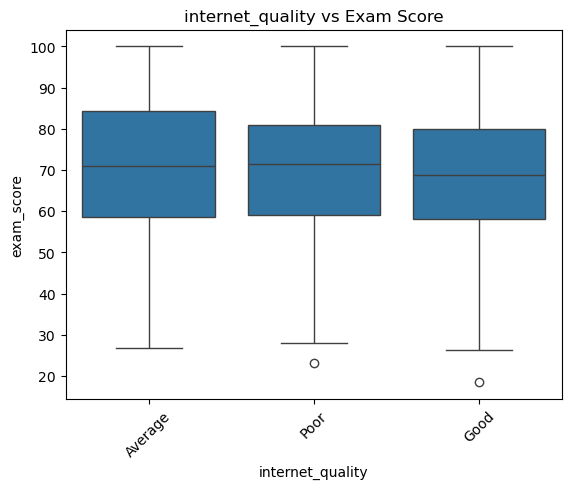

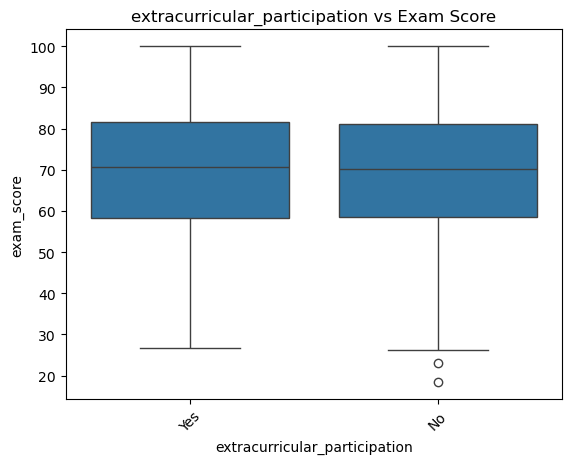

In [68]:
for col in categorical_cols:
    sns.boxplot(x=col,y='exam_score',data=df)
    plt.title(f'{col} vs Exam Score')
    plt.xticks(rotation=45)
    plt.show()

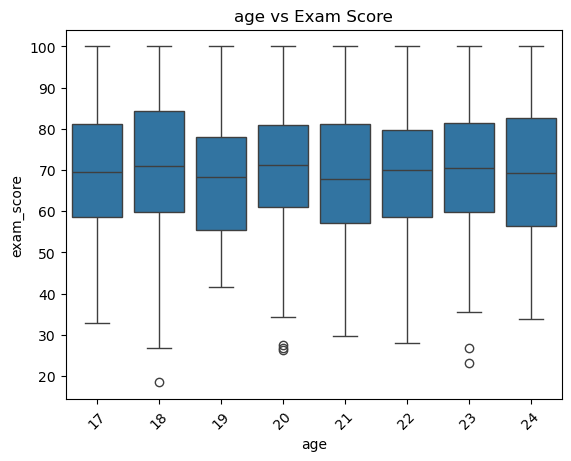

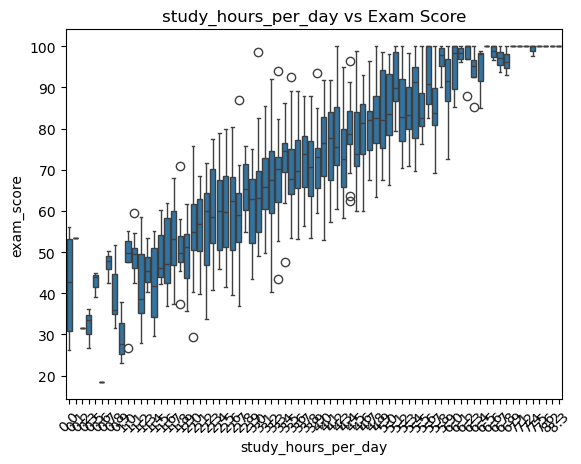

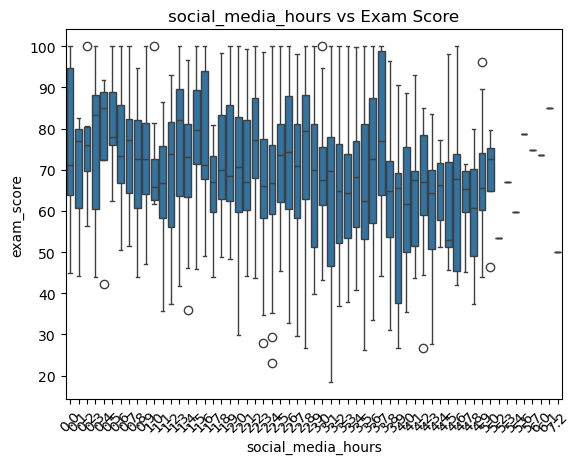

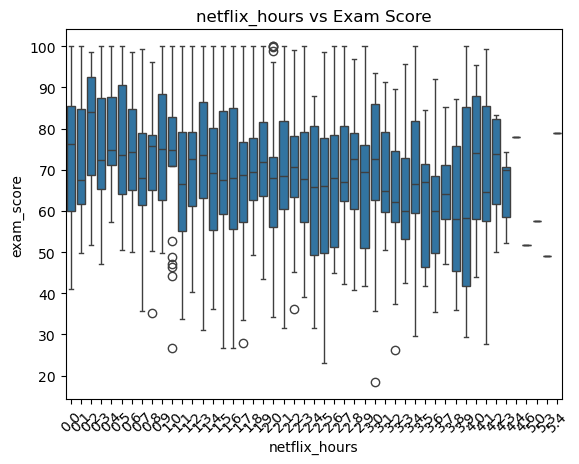

ValueError: Could not interpret value `attendence_percentage` for `x`. An entry with this name does not appear in `data`.

In [69]:
for col in numeric_cols:
    sns.boxplot(x=col,y='exam_score',data=df)
    plt.title(f'{col} vs Exam Score')
    plt.xticks(rotation=45)
    plt.show()

# Feature Engineering

In [29]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [30]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [31]:
features = ['study_hours_per_day','attendance_percentage','sleep_hours', 'mental_health_rating','part_time_job']

In [32]:
target='exam_score'

In [33]:
df_model=df[features+[target]]

In [34]:
df_model

,study_hours_per_day,attendance_percentage,sleep_hours,mental_health_rating,part_time_job,exam_score
0,0.0,85.0,8.0,8,No,56.2
1,6.9,97.3,4.6,8,No,100.0
2,1.4,94.8,8.0,1,No,34.3
3,1.0,71.0,9.2,1,No,26.8
4,5.0,90.9,4.9,1,No,66.4
...,...,...,...,...,...,...
995,2.6,77.0,7.5,6,No,76.1
996,2.9,86.0,6.8,6,Yes,65.9
997,3.0,61.9,6.5,9,No,64.4
998,5.4,100.0,7.6,1,Yes,69.7


In [35]:
le=LabelEncoder()

In [36]:
df_model['part_time_job']= le.fit_transform(df_model['part_time_job'])


In [37]:
df_model     

,study_hours_per_day,attendance_percentage,sleep_hours,mental_health_rating,part_time_job,exam_score
0,0.0,85.0,8.0,8,0,56.2
1,6.9,97.3,4.6,8,0,100.0
2,1.4,94.8,8.0,1,0,34.3
3,1.0,71.0,9.2,1,0,26.8
4,5.0,90.9,4.9,1,0,66.4
...,...,...,...,...,...,...
995,2.6,77.0,7.5,6,0,76.1
996,2.9,86.0,6.8,6,1,65.9
997,3.0,61.9,6.5,9,0,64.4
998,5.4,100.0,7.6,1,1,69.7


In [38]:
x = df_model[features]
y = df_model[target]

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
len(y_test)

182

In [41]:
len(y_train)

727

In [54]:
models={
    'Linear Regression':{'model':LinearRegression(),'params':{}},
    'Random Forest':{'model':RandomForestRegressor(),'params':{'n_estimators':[50,100],'max_depth':[5,10]}},
    'Decision Tree':{'model':DecisionTreeRegressor(),'params':{'max_depth':[3,5,10],'min_samples_split':[2,5]}}}

In [55]:
best_models=[]

In [56]:
for name , config in models.items():
  print(f'training {name}')
  grid = GridSearchCV(config['model'],config['params'],cv= 5,scoring="neg_mean_squared_error")
  grid.fit(x_train,y_train)

  y_pred = grid.predict(x_test)
  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  r2 = r2_score(y_test,y_pred)

  best_models.append({
      'model' : name,
      'best_params' : grid.best_params_,
      'rmse': rmse,
      'r2' : r2})

training Linear Regression
training Random Forest
training Decision Tree


In [57]:
results_df=pd.DataFrame(best_models)

In [58]:
results_df.sort_values(by='rmse',ascending=True)

,model,best_params,rmse,r2
0,Linear Regression,{},7.190938,0.809494
1,Random Forest,"{'max_depth': 10, 'n_estimators': 100}",7.199795,0.809025
2,Decision Tree,"{'max_depth': 5, 'min_samples_split': 5}",7.989826,0.764814


In [59]:
import joblib

best_row = results_df.sort_values(by='rmse',ascending=True).iloc[0]


In [60]:
best_row

model          Linear Regression
best_params                   {}
rmse                    7.190938
r2                      0.809494
Name: 0, dtype: object

In [61]:
best_model_name = best_row['model']
best_model_name

'Linear Regression'

In [62]:
best_model_config = models[best_model_name]
best_model_config

{'model': LinearRegression(), 'params': {}}

In [63]:
final_model = best_model_config['model'].set_params(**best_row['best_params'])

In [64]:
final_model.fit(x,y)

LinearRegression()

In [65]:
final_model.predict(x_test)

array([ 56.6125347 ,  50.42847388,  68.01649762,  74.59529628,
        85.98146352,  63.08078629,  80.04701348,  89.92801771,
        62.76704043,  71.53075848,  54.77872093,  83.1293514 ,
        55.50712337,  56.84795774,  83.44386551,  76.90551635,
        50.09576014,  90.10938622,  83.16135013,  72.9566029 ,
        80.61992577,  91.69729711,  49.28725829,  67.56464235,
        81.74485353,  58.60039915, 102.62470515,  74.41638106,
        61.46176878,  91.82549796,  56.40314637,  81.34776381,
        57.45595147,  64.13092859,  64.48227953,  68.37208385,
        89.69195799,  45.77718556,  62.717919  ,  78.07562614,
        61.85054984,  79.30877704,  70.5947591 ,  66.55221819,
        86.1259658 ,  68.67625259,  54.69003354, 107.4516993 ,
        74.5771561 ,  78.93711347,  59.86149389,  43.87777281,
        58.28779096,  73.79670885,  70.10700083, 102.67076152,
        78.71971636,  63.8141856 ,  76.46225033,  48.67665262,
        82.47701204,  71.17203049,  60.51626214,  74.64

In [66]:
joblib.dump(final_model,"best_model.pkl")

['best_model.pkl']

In [67]:
joblib.load("best_model.pkl").predict(x_test)

array([ 56.6125347 ,  50.42847388,  68.01649762,  74.59529628,
        85.98146352,  63.08078629,  80.04701348,  89.92801771,
        62.76704043,  71.53075848,  54.77872093,  83.1293514 ,
        55.50712337,  56.84795774,  83.44386551,  76.90551635,
        50.09576014,  90.10938622,  83.16135013,  72.9566029 ,
        80.61992577,  91.69729711,  49.28725829,  67.56464235,
        81.74485353,  58.60039915, 102.62470515,  74.41638106,
        61.46176878,  91.82549796,  56.40314637,  81.34776381,
        57.45595147,  64.13092859,  64.48227953,  68.37208385,
        89.69195799,  45.77718556,  62.717919  ,  78.07562614,
        61.85054984,  79.30877704,  70.5947591 ,  66.55221819,
        86.1259658 ,  68.67625259,  54.69003354, 107.4516993 ,
        74.5771561 ,  78.93711347,  59.86149389,  43.87777281,
        58.28779096,  73.79670885,  70.10700083, 102.67076152,
        78.71971636,  63.8141856 ,  76.46225033,  48.67665262,
        82.47701204,  71.17203049,  60.51626214,  74.64